# (1) Compute estimates for $\alpha_i, \beta_i, \sigma^2_{\epsilon_i}, i = 1,2,3,\cdots, 30$ 
To we need select a period and a market

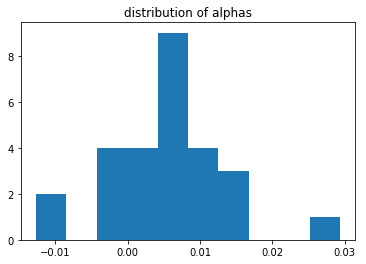

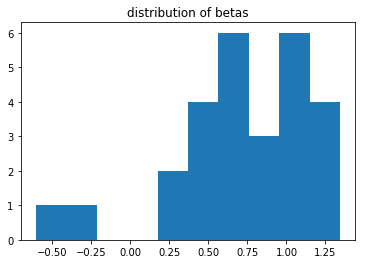

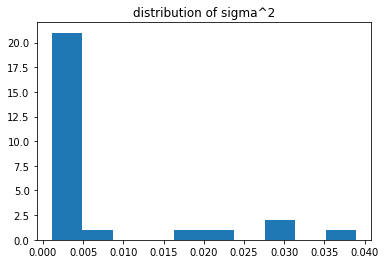

In [218]:
p = SIM("stockData_proj_1.csv")

beta, alpha, sigma2, varBeta = p.get_SIM_statistics(0,98)

plt.hist(alpha)
plt.title("distribution of alphas")
plt.show()
plt.hist(beta)
plt.title("distribution of betas")
plt.show()
plt.title("distribution of sigma^2")
plt.hist(sigma2)
plt.show()

## here is example to show  $\beta,  \alpha $

slope = 1.34407555756 	 intercept =  0.00101005502257


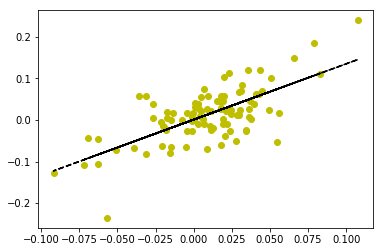

In [172]:
import numpy as np
import matplotlib.pyplot as plt

n = 12
x = p.market_r 
y = p.stocks_r[:,n]

def fit_print_plot(x,y):
    

    fit = np.polyfit(x,y,1)
    print("slope =", fit[0] , "\t intercept = ", fit[1] )

    fit_fn = np.poly1d(fit) 
    # fit_fn is now a function which takes in x and returns an estimate for y

    plt.plot(x,y, 'yo', x, fit_fn(x), '--k')
    plt.show()
    
fit_print_plot(x,y)

beta_i = 1.41710098443 	 alpha_i =  0.00738139506998


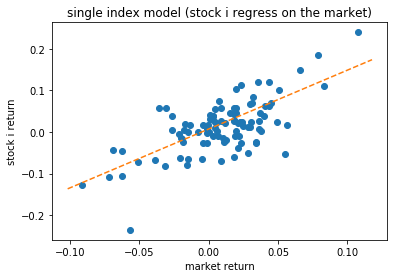

In [214]:
p = SIM("stockData_proj_1.csv")
n = 12
plt.plot( p.market_r ,  p.stocks_r[:,n]  , 'o' )
plt.title("single index model (stock i regress on the market)")
plt.xlabel("market return")
plt.ylabel("stock i return")
abline(beta[n], alpha[n])
print("beta_i =", beta[n] , "\t alpha_i = ", alpha[n] )
plt.show()

# (2) single index model for the covriance matrix

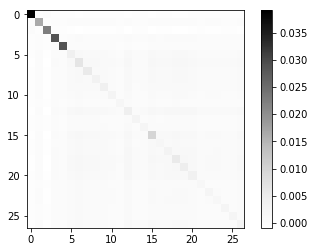

In [219]:
p = SIM("stockData_proj_1.csv")

com = p.covariance_matrix( 0 , p.T - 1)

plt.set_cmap('Greys')
plt.imshow( com )
plt.colorbar()
plt.show()

# (3) Blume's method

slope = 0.750759902658 	 intercept =  0.00192091010804


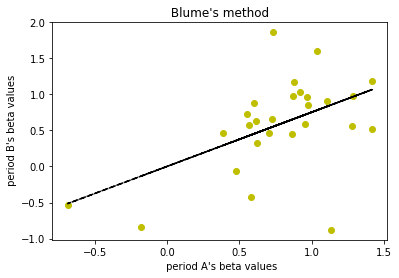

prediction of beta for 2019.4.1 to 2023.4.1
[-0.62475277 -0.31637273 -0.39450893 -0.65817111 -0.04551217  0.88532976
  1.20333595  0.72799899  0.77941134  0.44187107  0.49211634  0.34982277
  0.89534335  0.24535055  0.43153529  1.39892462  0.73741289  0.68157108
  0.73471207  0.38812952  0.4266097   0.47450883  0.66138738  0.34211422
  0.34618707  0.55266882  0.64671577]


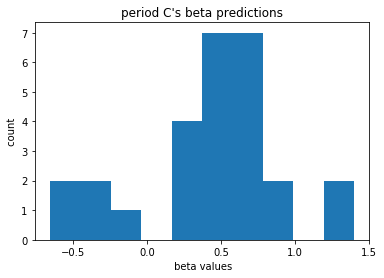

In [221]:
betaA, alpha, sigma2, varBetaA = p.get_SIM_statistics( 0 ,60 )
betaB, alpha, sigma2, varBetaB = p.get_SIM_statistics( 60 ,98 )

betaC = blume(betaA,betaB)
plt.hist(betaC)
print("prediction of beta for 2019.4.1 to 2023.4.1")
print(betaC)
plt.title("period C's beta predictions")
plt.xlabel( " beta values")
plt.ylabel( " count ")
plt.show()

# (3) Vasicek technique

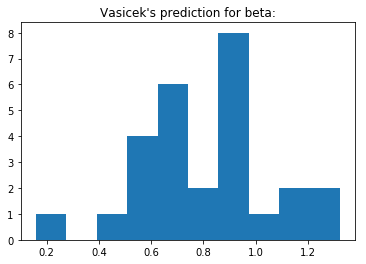

Vasicek's prediction for beta:
[0.50795101302652335, 0.67909699649988386, 0.15812910780594541, 0.89344591252679639, 0.68332139064724584, 0.85705537327032244, 0.9638725727721803, 0.92370210913823003, 0.89249420584760997, 0.92110291275816503, 0.72979826015931848, 0.42590796347113136, 1.3180802161401912, 0.64062541707562271, 0.59288494616433018, 0.74124049707550677, 0.86562733249661794, 1.0727223905918282, 1.1612577174231768, 1.3230434573722201, 1.1974663224454116, 0.62662285274201401, 0.62331310934885309, 0.85828860246632244, 0.70881404567574957, 0.58039823876076924, 0.9532933652735458]


PRESS =  10.6620128114


Mean Square Error =  0.394889363385


In [230]:
betaBv = vasicek(betaA, varBetaA)
plt.hist( betaBv )
plt.title("Vasicek's prediction for beta:")
plt.show()
print("Vasicek's prediction for beta:")
print(betaBv)

print("\n")
PRESS = np.sum( (np.array(betaB) - np.array(betaBv) )**2 )

print("PRESS = " , PRESS )
np.sum( (np.array(betaB) - np.array(betaBv) )**2 )/len( betaB )

print("\n")
print("Mean Square Error = " , PRESS/len( betaB ) )

In [213]:
import pandas as pd 
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt 
import numpy as np    

class SIM:
    def __init__( self , csvfilename ):
        
        a=pd.read_csv(csvfilename) 
        
        self.all_names = a.columns.tolist()[ 2: ]
        
        self.market_name  = a.columns.tolist()[2 ]
        self.stock_names  = a.columns.tolist()[3:]
        self.stock_number = len( self.stock_names )
        
        m = a[ self.all_names ].values
        self.T = m.shape[0]  # total time steps
        
        self.r =np.array(  ( m[ 1:self.T , : ] - m[ 0 : (self.T-1) , : ] )  / m[ 0 : ( self.T - 1 ) , : ]   )
        
        self.market_r = self.r[ : , 0  ]
        self.stocks_r = self.r[ : , 1: ]
        
        
    def get_SIM_statistics( self, T0 , T1 ):
        # using data from time period  [T0, T1)
        
        mar = self.market_r[ T0 : T1 ]
        sto = self.stocks_r[ T0 : T1 , : ]
        
        beta = [ ]
        alpha = [ ]
        sigma2 = [ ]
        varBeta = [ ]
        mar_mean = np.mean( mar )
        
        for i in range( self.stock_number ):
            a = sto[ : , i ]
            a_mean = np.mean( a )
            
            b = np.sum(  ( a - a_mean  ) * (    mar - mar_mean  )  ) 
            c = np.sum(  ( mar - mar_mean  ) ** 2  )
            
            beta0 = b/ c 
            beta.append( beta0 )
            
            alpha0 = a_mean -beta0* mar_mean
            alpha.append( alpha0  )
            
            sigma20 = np.sum(  ( a - alpha0 - beta0* mar ) ** 2  ) / ( T1 - T0 - 1 )
            sigma2.append( sigma20 )
            
            varBeta0 = sigma20/c
            varBeta.append( varBeta0 )
        
        return beta, alpha, sigma2, varBeta
    
    
    def covariance_matrix(self, T0 , T1):

        mar = self.market_r[ T0 : T1 ]
        mar_mean = np.mean( mar )

        mar_sigma2 = np.sum( ( mar - mar_mean ) ** 2 ) / ( T1-T0 )

        beta, alpha, sigma2, varBeta = self.get_SIM_statistics( T0 , T1 )



        betabeta = [ [i*j for i in beta ] for j in beta ]
        covariantMatrix = mar_sigma2 * np.matrix( betabeta ) + np.diag(sigma2)

        return covariantMatrix

            
def blume(x,y):
    # x is betaA
    # y is betaB
    
    fit = np.polyfit(x,y,1)
    print("slope =", fit[0] , "\t intercept = ", fit[1] )
    fit_fn = np.poly1d(fit) 
    # fit_fn is now a function which takes in x and returns an estimate for y
    plt.plot(x,y, 'yo', x, fit_fn(x), '--k' )
    plt.xlabel( " period A's beta values")
    plt.ylabel( " period B's beta values")
    plt.title( " Blume's method ")
    plt.show()
    #plt.plot(y, fit_fn(y), 'ro')
    #plt.show()
    return fit_fn(y)         
        
def vasicek( betaA , varBetaA ):
    
    n = len(betaA)
    betaA_mean = np.mean( betaA )
    betaA_var = np.sum( ( betaA - betaA_mean )**2  )/ (n-1)
    
    betaC = []
    
    for i in range(n):
        w = varBetaA[i] /( varBetaA[i] + betaA_var) 
        temp =  w * betaA_mean  + ( 1 - w ) * betaA[i]
        betaC.append(temp)
        
    return betaC
        

def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')